# Machine Learning Project: Wine Quality

## Case study

## 1. Aims, objectives and plan

### Aims and objectives


The aims and objectives of this project is to apply two machine learning algorithms to a chosen dataset to extract insights and assess model performance. The dataset that is to be used in this project is the 'Wine Quality', the dataset contains indicators relating to a wine attributes such as density, alchohol content and sulfur content, the target label is the . The project seeks to explore the relationship between wine features and content in order to classify percieved quantity. In particular, the project seeks to explore and compare the efficiency of a neural network against a gradient boosting classifier. 

The project will first require preprocessing and exploratory data analysis (EDA), this will enable the discovery of the key features that can be used in the models alongside discovering any missing data or class imbalances. 
Upon preprocessing and splitting data into train/test/val groups we can proceed to train our models and optimise hyper-parameters to maximise the efficiency of the models in respect to the selected accuracy metric. This will then enable the selection and deployment of the most suitable model. 


###  Plan 

The plan of this project is to assess deep learning against gradient boosting algorithms, to approximate the quality of wine. First I performed exploratory data analysis to investigate correlations and importance between attributes. I proceeded to pre-processed the data by utilising feature selection and engineering before applying random over sampling to handle class imbalance. Each algorithm is fit to the training data and an initial F1 accuracy reading is taken, subsequently the model hyper parameters are then fine tuned and a second reading is taken to explore the improvement. A written assessment between the algorithms is then performed.


## 2. Understanding the case study

###  Case study analysis

1. Class imbalance: Upon exploring the data, it was apparent that the classes were significantly imbalanced, extreme low and high qualities held far fewer instances than the middle range readings. While classes with 0 readings cannot be remedied, I applied oversampling to ensure that the existing classes are learnt equally.
2. Multicollinearity: The data correlation matrix yielded results that suggested that suggested that attributes shared high correlations, an example being ‘free sulphur dioxide’ and ‘total sulphur dioxide’. This was handled through a mixture of feature engineering and selection, free and total sulphur could be converted into a ratio, while other colinear attributes could be dropped. 
3. Feature scaling: When graphing and perusing each attribute, a majority of the features follow a gaussian distribution, since all feature values were continuous, I applied the sklearn standardscaler to normalise these features, this enables all input attributes to be evaluated fairly. 
4. Missing values and outliers: Fortunately, the dataset did not hold any missing values and few outliers which suggested that minimal needed to be done to rectify this. Residual sugar however did hold outliers and by extension would skew the distribution, this was handled by applying a logarithmic transformation to the impact of this.




## 3. Dataset description

The Wine Quality dataset hosts 6,497 rows of data amongst 12 features, each row represents a different wine while the features describe the characteristics. Quality (target variable) of the wine is assessed by a categorical rating of 1 – 10, it should be noted however that no wines were rated 1,2 or 10 which will affect the models ability to generate a reliable prediction for any deployed data that falls within these values. 
To summarise the steps of preprocessing, the steps were as follows: 
-	Feature engineering: This contained a mixture of selection and engineering, with the creation of the sulfur dioxide ratio to replace the free and total sulfur features. 
-	Skewed and null data: The dataset did not contain any null values, therefore it was not needed to impute or remove any data. The residual sugar attribute held some outliers therefore skewing the data, a logistic transformation was applied for mitigation.
-	Class imbalances: The classes held significant imbalances, with some classes even holding zero data, while these cannot be mitigated, implementing random over-sampling assists to balance the wine quality training set. 


Reference: 
Cortez, P., Cerdeira, A., Almeida, F., Matos, T., & Reis, J. (2009). Wine Quality [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C56S3T.




In [54]:
import pandas as pd 
from sklearn import preprocessing, metrics, linear_model, model_selection, ensemble, svm
from imblearn.over_sampling import RandomOverSampler
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import torch
from torch import nn, optim
from itertools import product
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
wine_quality = fetch_ucirepo(id=186) 
  
# data (as pandas dataframes) 
X = wine_quality.data.features 
y = wine_quality.data.targets 
  
# metadata 
print(wine_quality.metadata) 
  
# variable information 
print(wine_quality.variables) 

{'uci_id': 186, 'name': 'Wine Quality', 'repository_url': 'https://archive.ics.uci.edu/dataset/186/wine+quality', 'data_url': 'https://archive.ics.uci.edu/static/public/186/data.csv', 'abstract': 'Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests (see [Cortez et al., 2009], http://www3.dsi.uminho.pt/pcortez/wine/).', 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 4898, 'num_features': 11, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['quality'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Wed Nov 15 2023', 'dataset_doi': '10.24432/C56S3T', 'creators': ['Paulo Cortez', 'A. Cerdeira', 'F. Almeida', 'T. Matos', 'J. Reis'], 'intro_paper': {'ID': 252, 'type': 'NATIVE', 'title': 'Modeling wine preferences

In [55]:
df = X.join(y) # Combine the data as this allows easier exploration between the target label and features. 

In [56]:
print(f'Wine dataset information: {df.info()}. \nDataset description: {df.describe()}\nDataframe Null values: {df.isnull().sum()}') # Descriptive break down of the diabeetes dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 609.2 KB
Wine dataset information: None. 
Dataset description:        fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
c

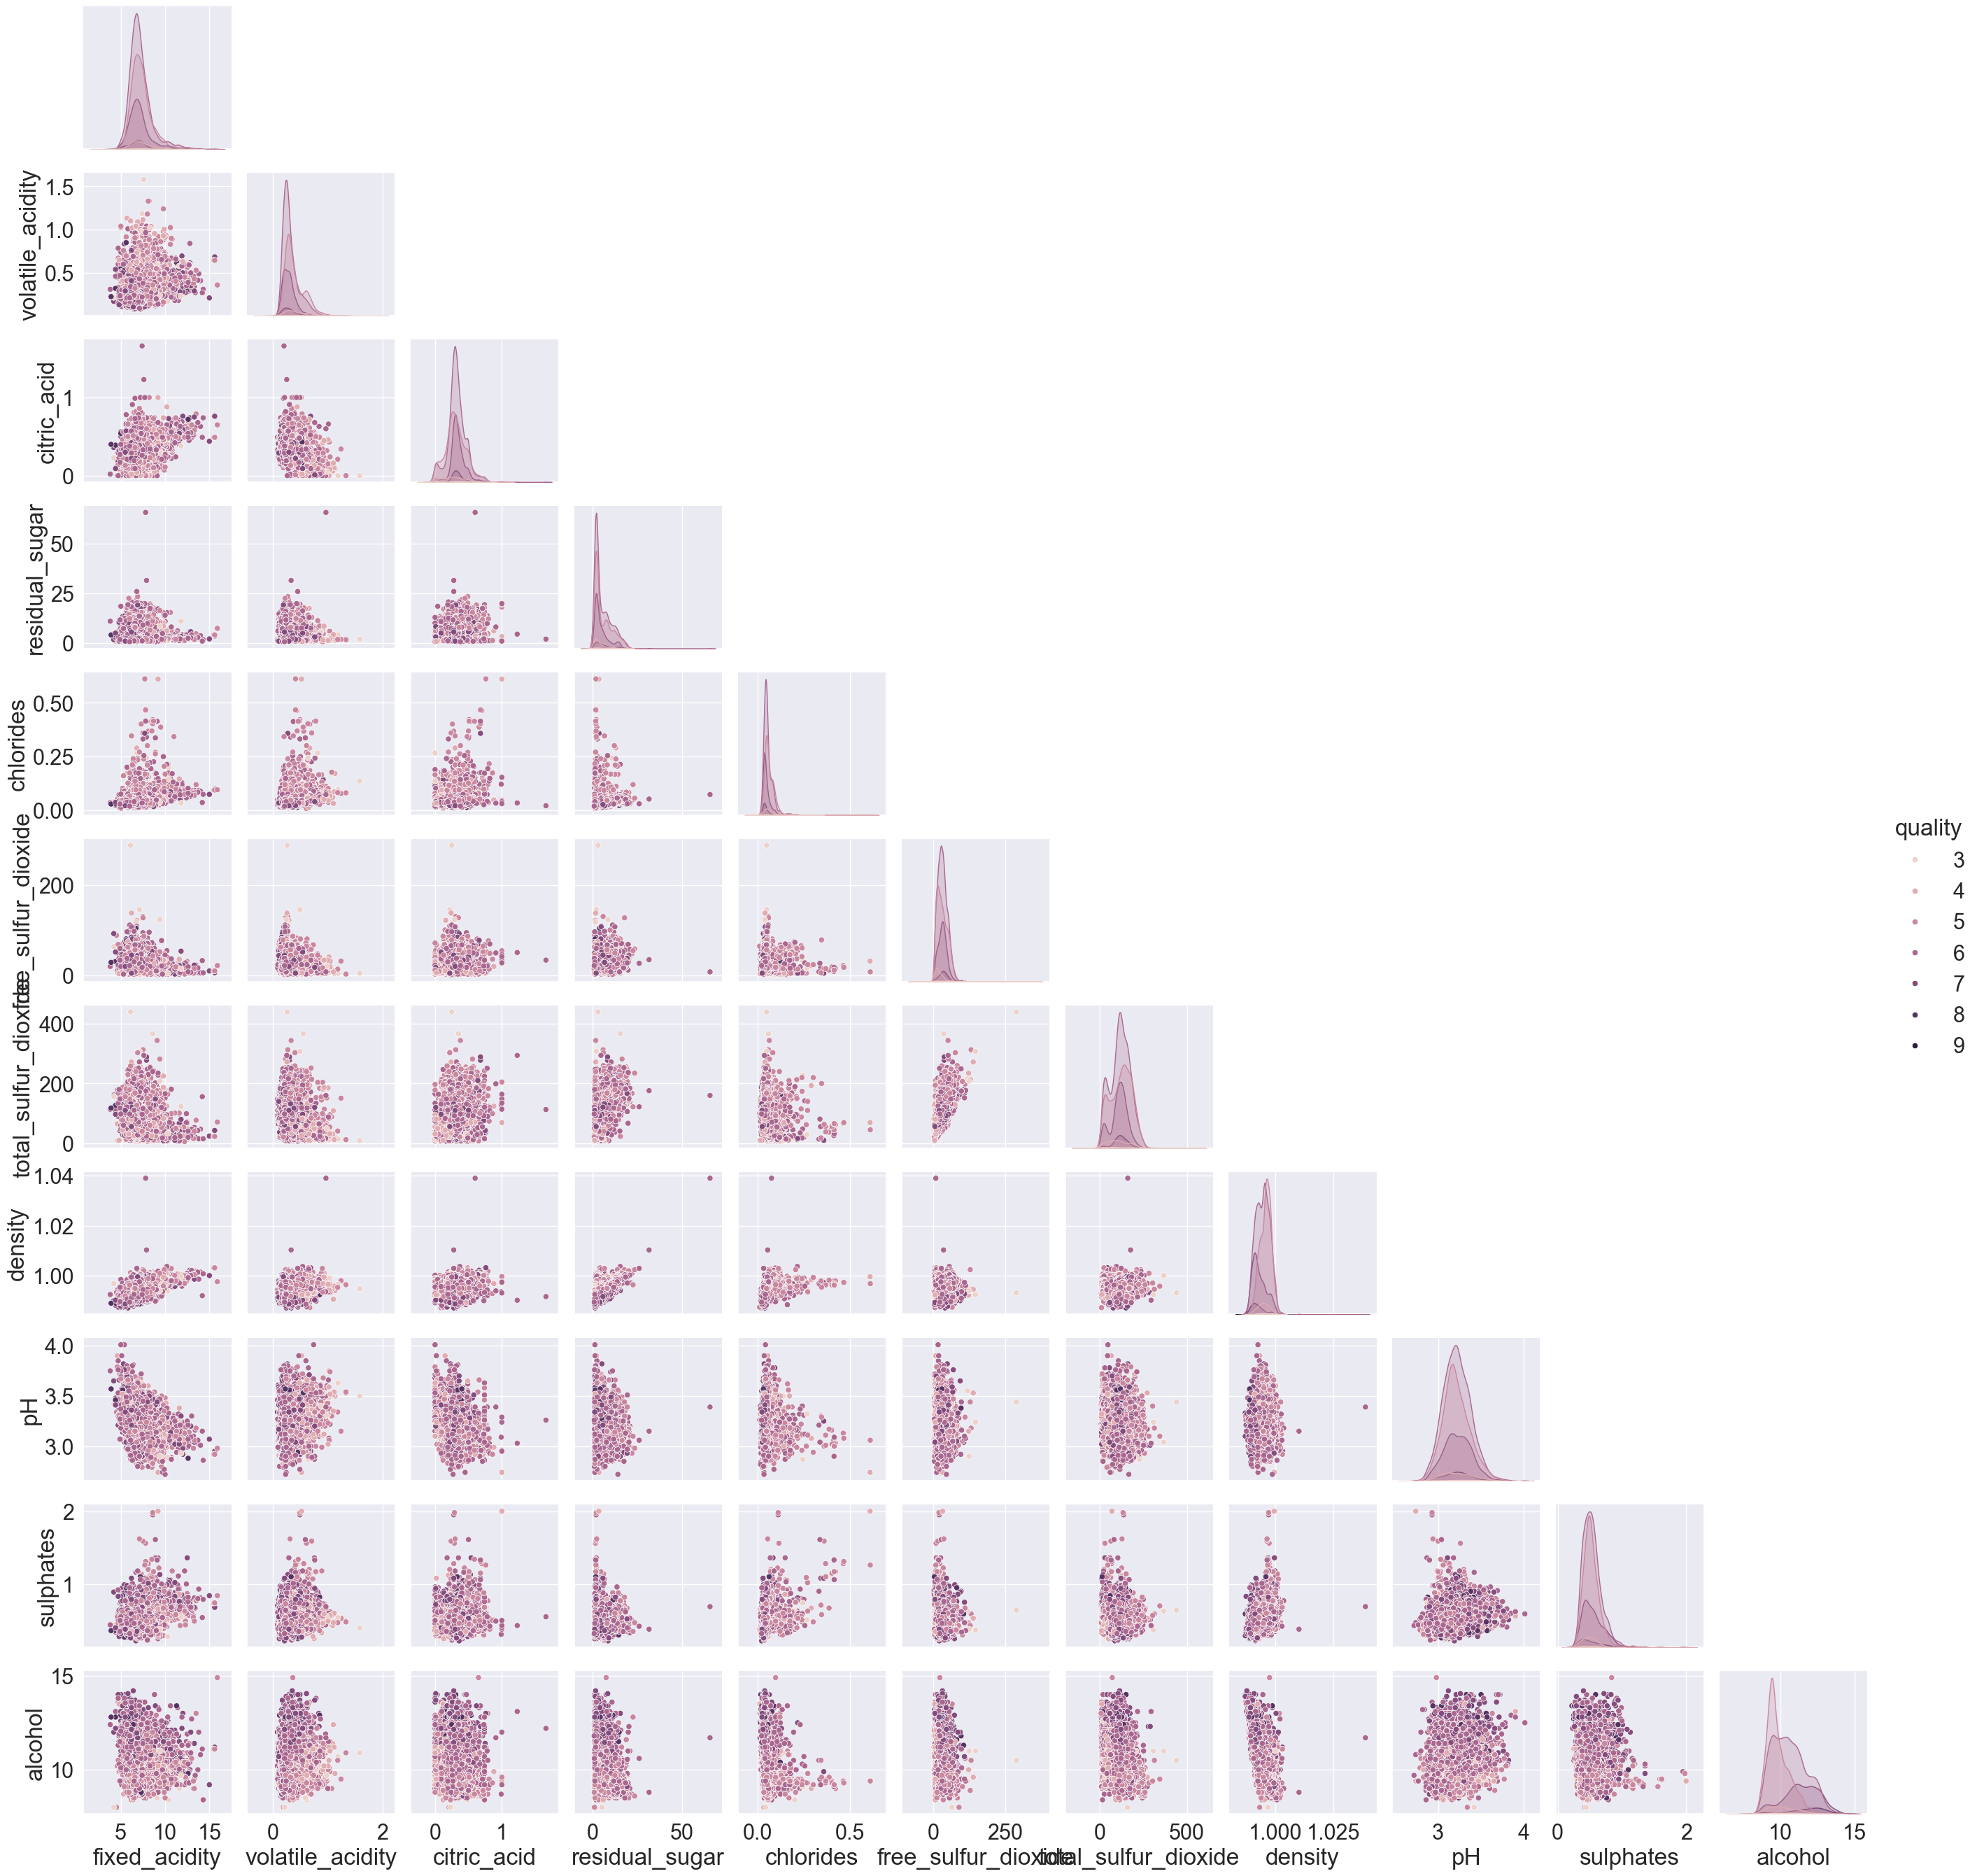

In [57]:
g = sns.pairplot(df, hue = 'quality', corner = True)

In [58]:
g.savefig('Pairplot_wine.png')

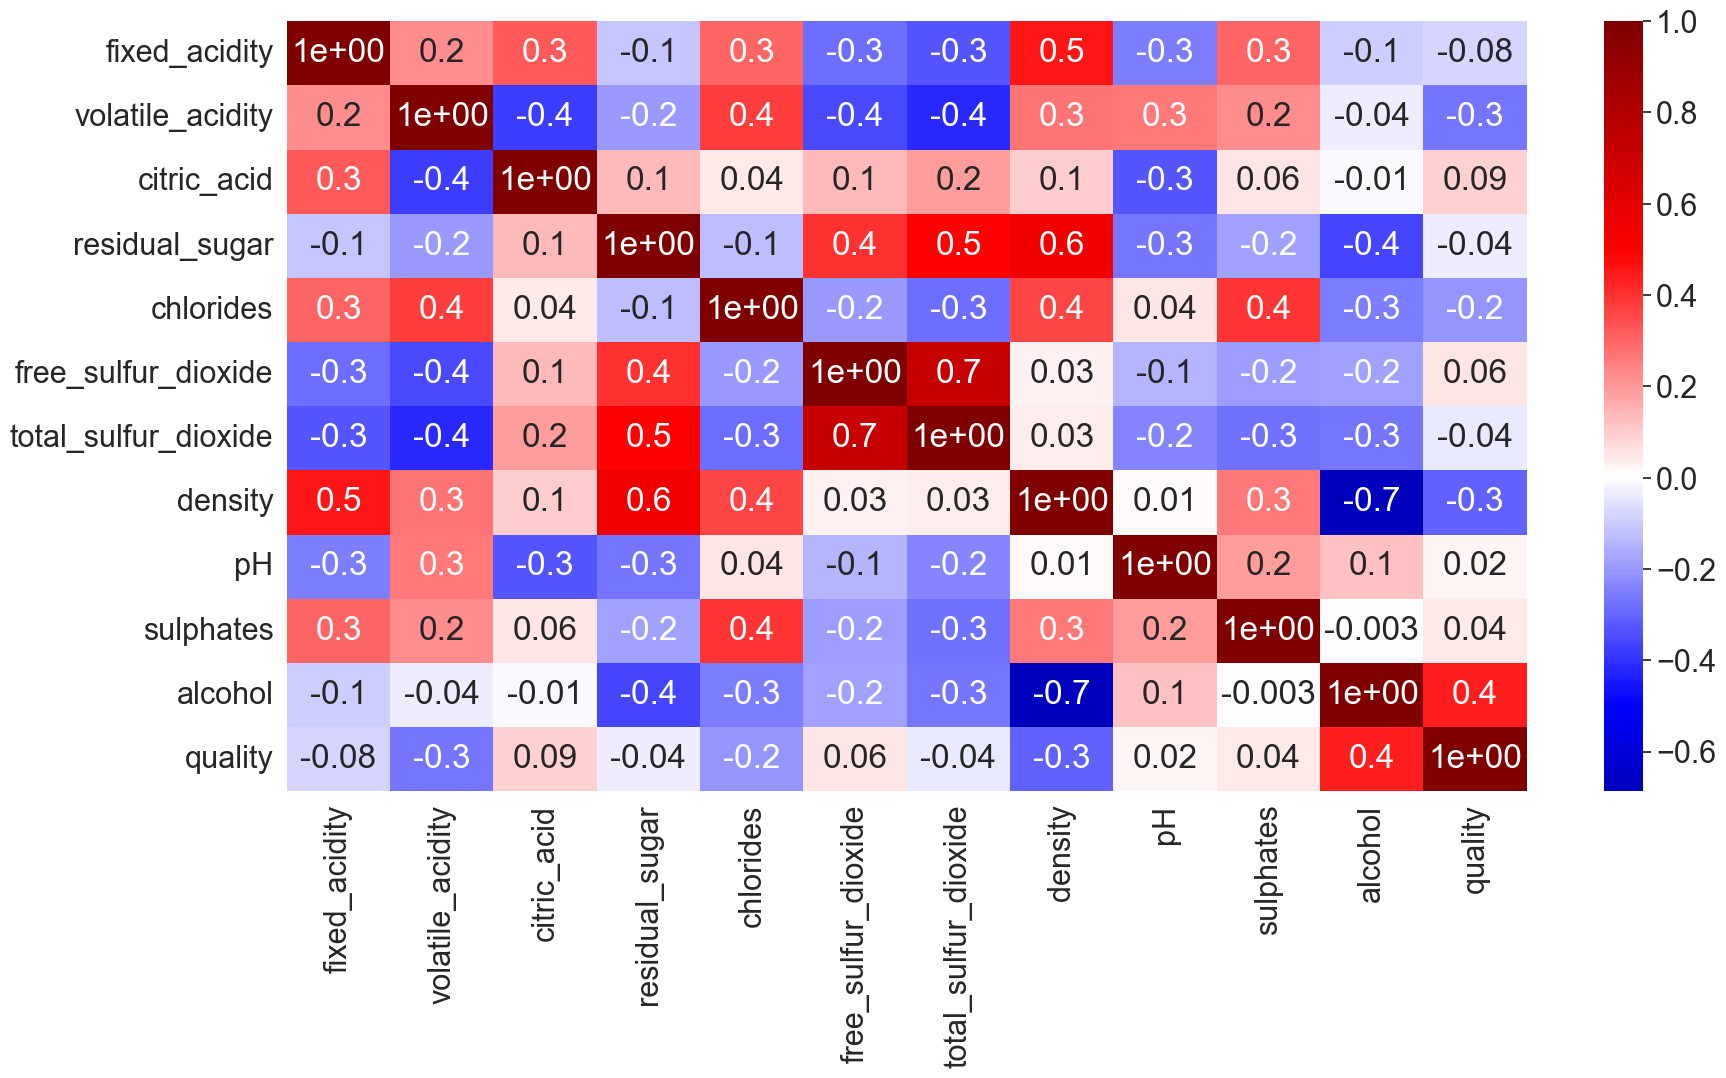

In [59]:
plt.figure(figsize = (20,10))
sns.set(font_scale = 2)

hm = sns.heatmap(df.corr(method = 'pearson'),cmap = 'seismic', center = 0,annot = True, fmt = '0.1')
plt.savefig('heatmap_wine.png')
plt.show()


In [60]:
df.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [61]:
X['sulfur_dioxide_ratio'] = X['free_sulfur_dioxide'] / X['total_sulfur_dioxide']

X.drop(columns=['total_sulfur_dioxide','free_sulfur_dioxide','density'],inplace = True) # Free sulfur and total sulfur is highly corrolated, by feature engineering a ratio I can drop both. Density has high corrlation with afew variables so I can drop

C:\Users\Owner\AppData\Local\Temp\ipykernel_20192\4276716693.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['sulfur_dioxide_ratio'] = X['free_sulfur_dioxide'] / X['total_sulfur_dioxide']
C:\Users\Owner\AppData\Local\Temp\ipykernel_20192\4276716693.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(columns=['total_sulfur_dioxide','free_sulfur_dioxide','density'],inplace = True) # Free sulfur and total sulfur is highly corrolated, by feature engineering a ratio I can drop both. Density has high corrlation with afew variables so I can drop


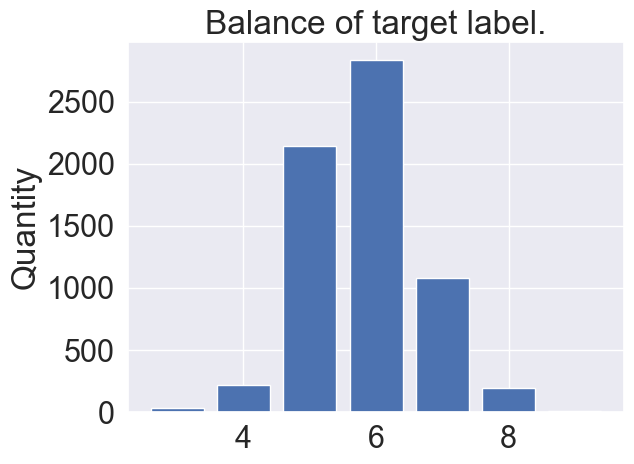

Wine balance: 6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64


In [62]:
quality_counts = df['quality'].value_counts()


plt.bar(x=quality_counts.index, height=quality_counts.values)
plt.title('Balance of target label.')
plt.ylabel('Quantity')
plt.show()

print(f'Wine balance: {quality_counts}')

We can clearly see that we have an imbalanced dataset with the vast majority sitting between the ratings of 5, 6, and 7. Going forwards it's clear that we will need to utilise f1 score to ensure recall and precision are accounted for. I will split the data with stratification, then oversample the training data to account for the imbalance.

In [63]:
display(df.head(5))

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

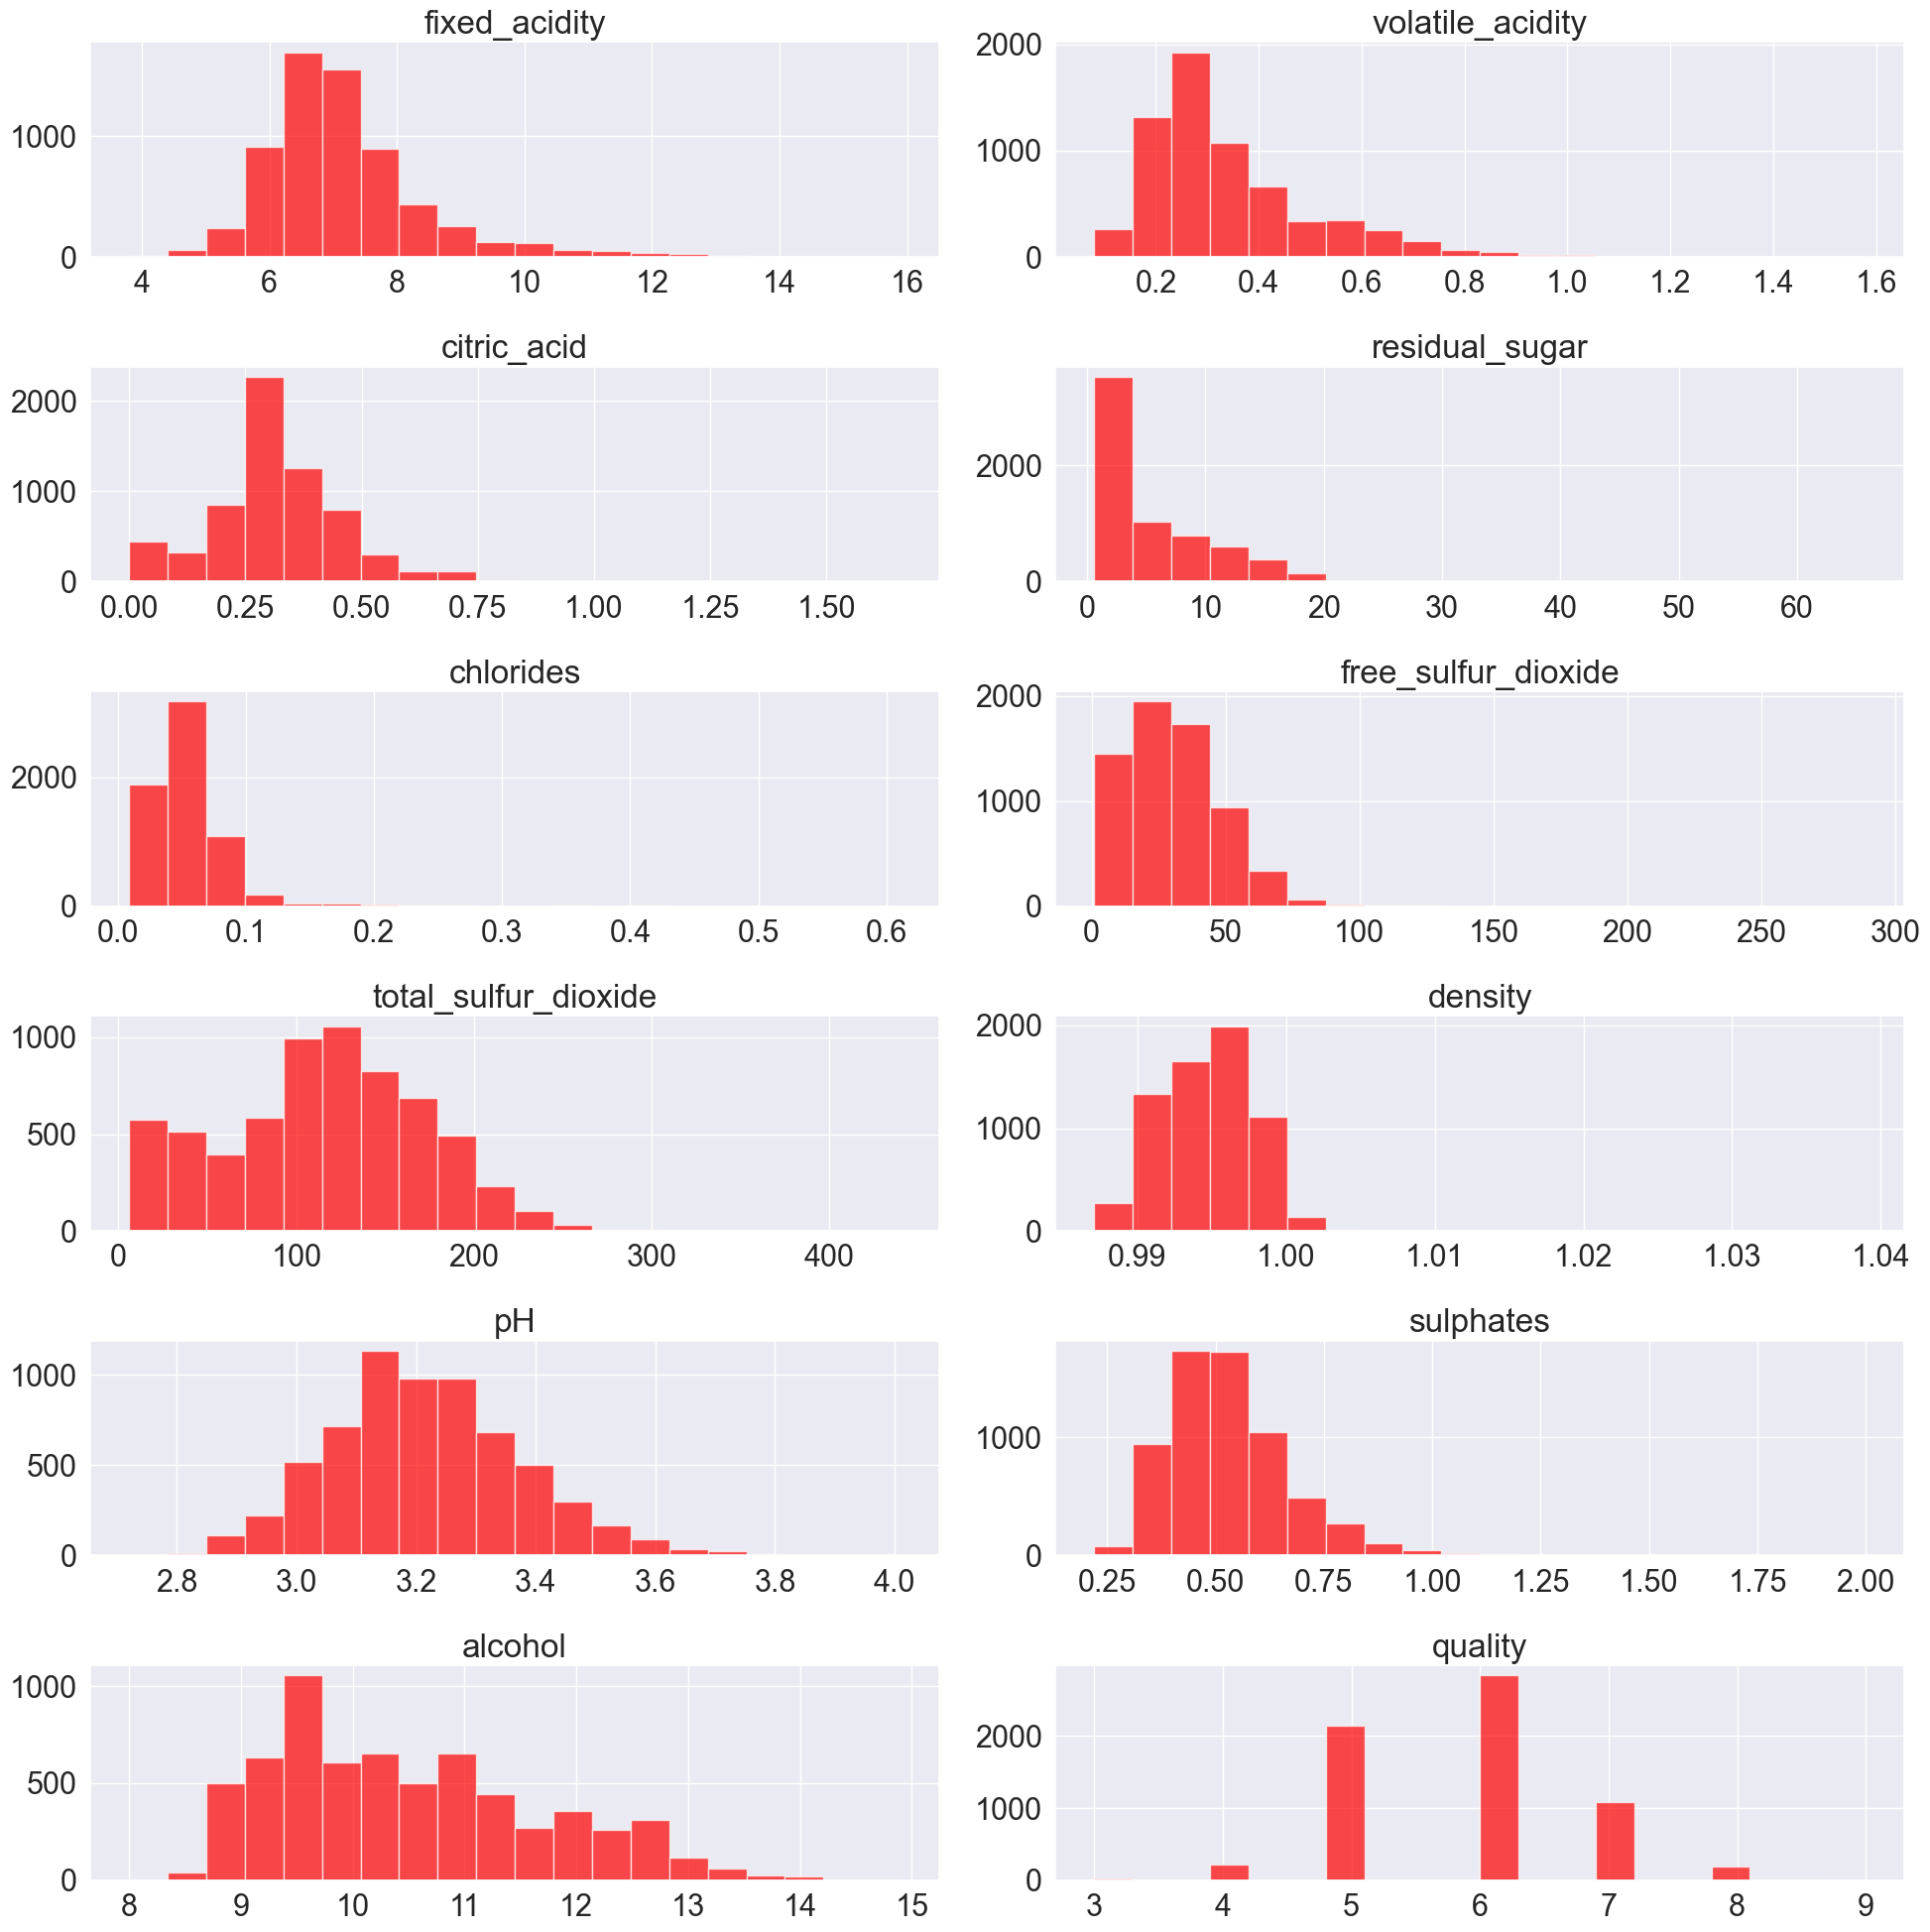

In [64]:
plt.figure(figsize=(20, 20))

for i, column in enumerate(df.columns):
    plt.subplot(6,2,i+1)
    plt.hist(df[column], bins=20, color='red', alpha=0.7)
    plt.title(f'{column}')
    
plt.tight_layout()
    
plt.show()

In [65]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y , train_size= 0.9,stratify= y, shuffle= True)



ROS = RandomOverSampler(random_state=42)
X_train, y_train = ROS.fit_resample(X_train, y_train)



X_test,X_val,y_test,y_val = model_selection.train_test_split(X_test,y_test , train_size= 0.5)

In [66]:
def process(data, training = False): # Here all preprocessing steps may be applied, since this is post splitting we avoid 
    global scaler
    
    if training:
        scaler  = preprocessing.StandardScaler()
        min_max_scaler =  preprocessing.MinMaxScaler()
        
        data['residual_sugar'] = np.log1p(data['residual_sugar'])
        data[data.columns] = scaler.fit_transform(data[data.columns])
       # data = min_max_scaler.fit_transform(data)
        
    else: 
        data['residual_sugar'] = np.log1p(data['residual_sugar'])
        data[data.columns] = scaler.transform(data[data.columns])
        #data = min_max_scaler.transform(data)
    return data

In [67]:
X_train.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'pH', 'sulphates', 'alcohol', 'sulfur_dioxide_ratio'],
      dtype='object')

In [68]:
X_train = process(X_train, training = True)
X_test = process(X_test,training = False)
X_val = process(X_val,training = False)

In [69]:
display(X_train.head(5))

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0      -0.162614         -0.910890     2.907431        1.934679  -0.224301   
1      -0.460041          0.871851    -1.326309       -0.701902   0.557955   
2      -1.203608         -1.133732    -0.146415        0.260013  -0.273192   
3      -0.608754         -0.465205     0.547641        1.300486  -0.346528   
4      -0.311327         -0.861369    -0.007603        0.974003  -0.273192   

         pH  sulphates   alcohol  sulfur_dioxide_ratio  
0  0.856115   1.090582 -1.376830             -0.286743  
1  2.247459   0.882363 -0.782677              0.931912  
2  0.432663  -0.644571 -1.154023             -0.739215  
3 -0.353748  -0.089322 -1.079753              0.268899  
4  0.977102  -0.852789 -0.262792             -0.427358

## 4. Technique 1

### Choice motivation & Schematic figure



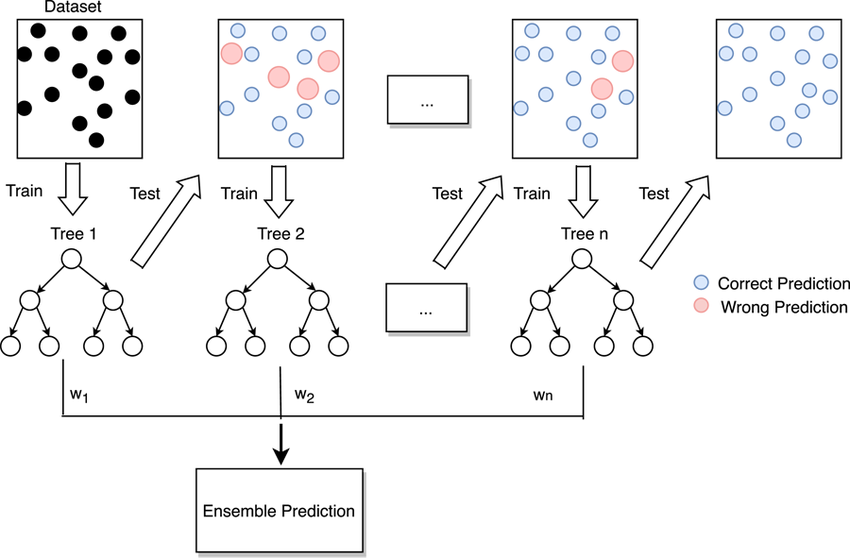 


I have selected gradient boosting as the first algorithm due to its ability to create highly accurate models through sequentially improving decision trees. The algorithm is resilient to overfitting, being able to and is known to be one of the best performing methods for complex, non linear datasets. Gradient boosting is highly explainable. 
As can be seen in the attached schematical diagram each iteration of the decision trees informs the next one through residual corrections, this leads to an ensemble prediction.





Reference: Improving Convection Trigger Functions in Deep Convective Parameterization Schemes Using Machine Learning - Scientific Figure on ResearchGate. Available from: https://www.researchgate.net/figure/Flow-diagram-of-gradient-boosting-machine-learning-method-The-ensemble-classifiers_fig1_351542039 [accessed 27 Oct 2024]


### Setting hyper parameters


In [70]:
model = ensemble.GradientBoostingClassifier()

c:\Users\Owner\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training F1: [0.99473787 0.86894211 0.68587214 0.50437122 0.71722846 0.88554783
 1.        ]
Test F1; [0.         0.29268293 0.62857143 0.42857143 0.45454545 0.11111111]
Val: [0.         0.20408163 0.58937198 0.456621   0.4822695  0.2       ]
Averages for metrics, Train: 0.8140394088669951 Test: 0.4676923076923077 Val: 0.4676923076923077


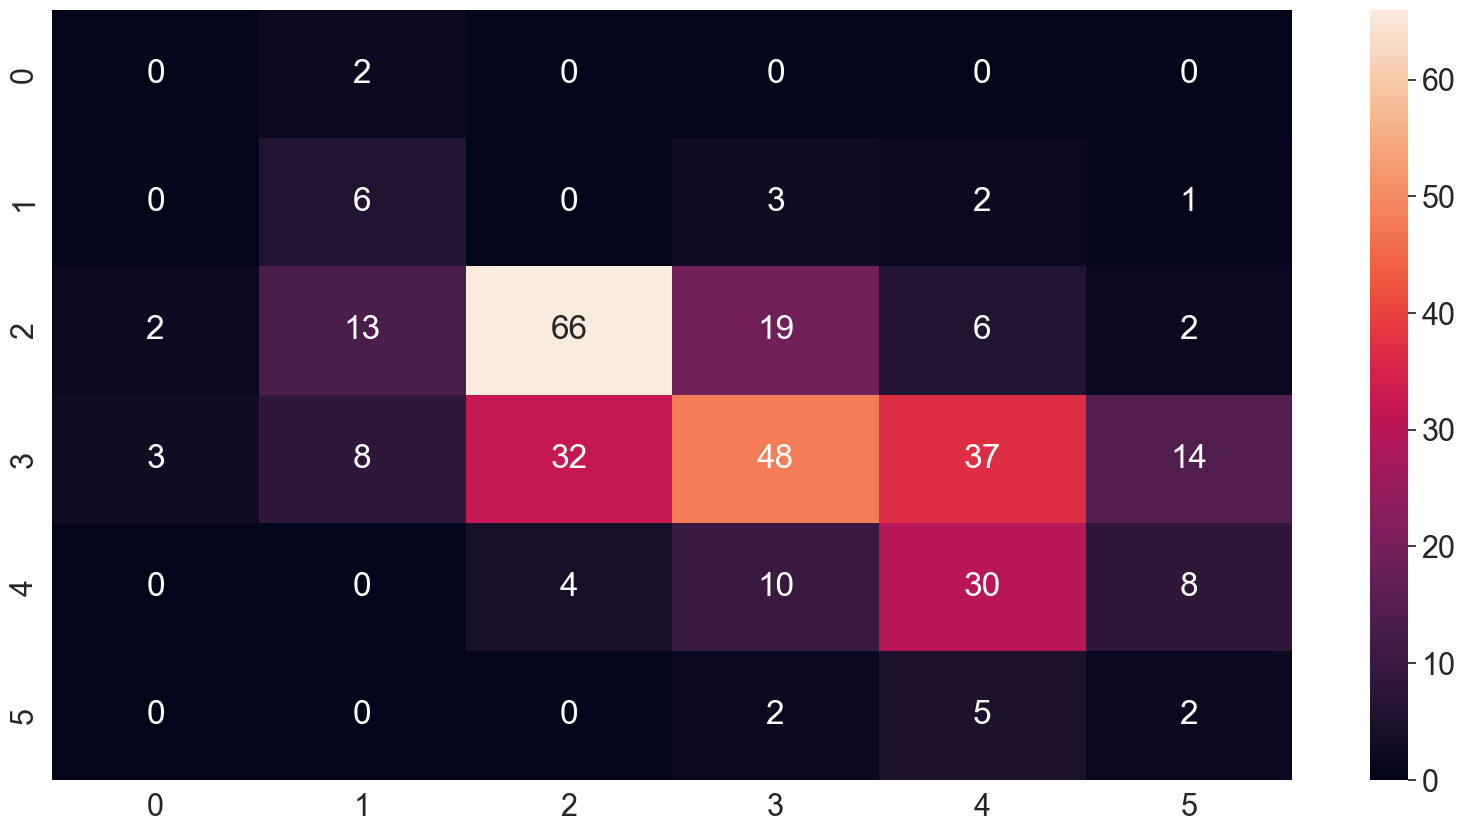

In [71]:
model.fit(X_train,y_train)
print(f"Training F1: {metrics.f1_score(model.predict(X_train),y_train, average=None)}\nTest F1; {metrics.f1_score(model.predict(X_test),y_test, average=None)}\nVal: {metrics.f1_score(model.predict(X_val),y_val, average=None)}")
print(f"Averages for metrics, Train: {metrics.f1_score(model.predict(X_train), y_train, average='micro')} Test: {metrics.f1_score(model.predict(X_test), y_test, average='micro')} Val: {metrics.f1_score(model.predict(X_test), y_test, average='micro')}")
plt.figure(figsize=(20,10))
sns.set(font_scale = 2)
sns.heatmap(metrics.confusion_matrix(y_true= y_test, y_pred= model.predict(X_test)),annot = True)
plt.show()

### Optimising hyper parameters

In [72]:
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 500],
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5]
}

gridsearch = model_selection.RandomizedSearchCV(model, param_distributions = param_grid,n_iter= 80, cv=2, verbose=1, n_jobs=-1)
gridsearch.fit(X_train,y_train)

best_params = gridsearch.best_params_

print(f"Optimised parameters: {best_params}")

Fitting 2 folds for each of 80 candidates, totalling 160 fits


c:\Users\Owner\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Optimised parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 3, 'max_depth': 6, 'learning_rate': 0.2}


### Performance metrics for training

c:\Users\Owner\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training F1: [1. 1. 1. 1. 1. 1. 1.]
Test F1; [0.         0.3        0.67857143 0.67595819 0.66019417 0.57142857]
Val: [0.         0.18181818 0.73593074 0.69473684 0.69724771 0.16666667]
Averages for metrics, Train: 1.0 Test: 0.6584615384615384 Val: 0.6584615384615384


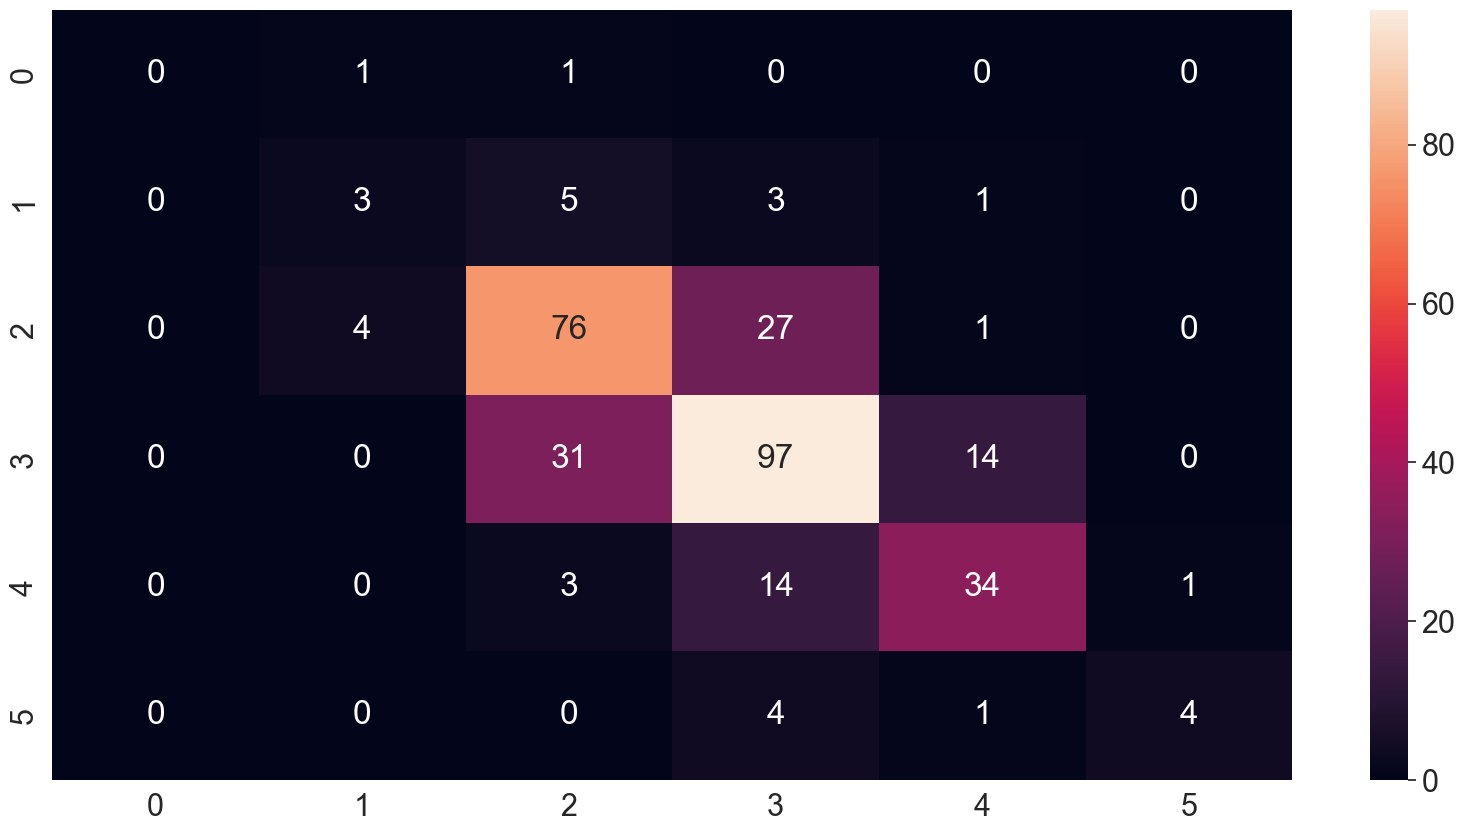

In [73]:
model = ensemble.GradientBoostingClassifier(**best_params)

model.fit(X_train,y_train)
print(f"Training F1: {metrics.f1_score(model.predict(X_train),y_train, average=None)}\nTest F1; {metrics.f1_score(model.predict(X_test),y_test, average=None)}\nVal: {metrics.f1_score(model.predict(X_val),y_val, average=None)}")
print(f"Averages for metrics, Train: {metrics.f1_score(model.predict(X_train), y_train, average='micro')} Test: {metrics.f1_score(model.predict(X_test), y_test, average='micro')} Val: {metrics.f1_score(model.predict(X_test), y_test, average='micro')}")
plt.figure(figsize=(20,10))
sns.set(font_scale = 2)
sns.heatmap(metrics.confusion_matrix(y_true= y_test, y_pred= model.predict(X_test)),annot = True)
plt.show()

F1_gb = metrics.f1_score(model.predict(X_test), y_test, average='micro')
GB_model = model

## 5. Technique 2

### Discuss your motivation for choosing the technique and  provide a schematic figure of the process



The second algorithm to be assessed is the deep neural network. This model has been selected for its ability to model complex and high dimentional data. The algorithm also is able to capture non-linear patterns through multiple layers, each layer will learn features from the dataset through forwards and backwards propagation. The model will utilise the Relu activation function with a stochastic gradient descent optimiser to minimise error and generlise to unseen data.

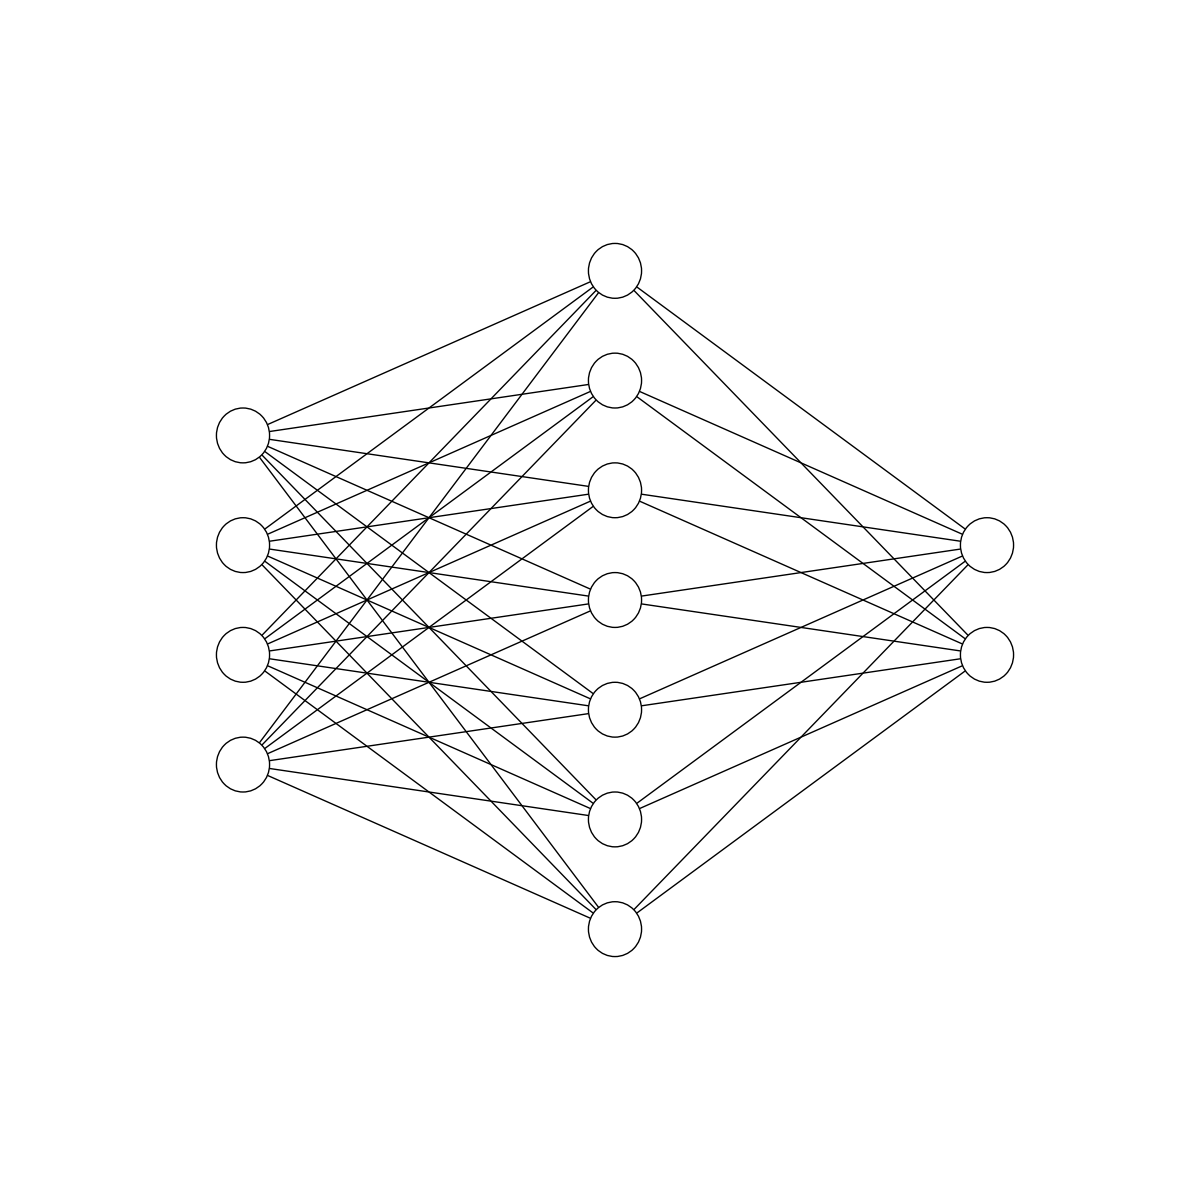

The model will take the data attributes as the input later before passing it through 2 hidden layers and the output layer (each with weights and the relu activation function) to output predictions. This will show how the layers capture features from the dataset.



In [74]:
class nn_wine_classifier(nn.Module):
    def __init__(self,input_size,class_size):
        super().__init__()
        self.linear1 = nn.Linear(input_size, 64)
        self.linear2 = nn.Linear(64, 32)
        self.linear3 = nn.Linear(32, 20)
        self.linear4 = nn.Linear(20, class_size)

        self.relu = nn.ReLU()

    def forward(self,data):
        
        data = self.relu(self.linear1(data))
        data = self.relu(self.linear2(data))
        data = self.relu(self.linear3(data))
        data = self.linear4(data)
        return data

In [75]:
y_train = np.array(y_train).flatten()  
y_test = np.array(y_test).flatten()  
y_val = np.array(y_val).flatten()  

In [76]:
def train_nn(base_model = model,lr = 0.01, epochs = 100, tolerance = 15,momentum = 0.6, optimiser_type='SGD'):
    model = base_model
    best_test_loss = np.inf
    train_test_metrics = np.zeros([2,epochs])
    loss = nn.CrossEntropyLoss()
    #loss = nn.MSELoss()
    outstanding = 0
    counter = 0         
    #optimiser = optim.Adam(model.parameters(),lr = lr)
    if optimiser_type == 'SGD':
        optimiser = optim.SGD(model.parameters(), lr=lr, momentum=momentum)
    elif optimiser_type == 'Adam':
        optimiser = optim.Adam(model.parameters(), lr=lr)
    for epoch in range(epochs):
        model.train()
        optimiser.zero_grad()
        
        # forwards pass
        y_pred = model(torch.from_numpy(X_train.values).float())
        train_loss = loss(y_pred, torch.from_numpy(y_train).long())

        # back propagation and loss calculations
        train_loss.backward()
        optimiser.step()
        
    
        # metrics/early stopping 
        with torch.no_grad():
            model.eval()
            test_outputs = model(torch.from_numpy(X_test.values).float())
            test_loss = loss(test_outputs, torch.from_numpy(y_test).long())
            train_test_metrics[0, epoch] = train_loss.item()
            train_test_metrics[1, epoch] = test_loss.item()
            if epoch % 10 == 0:
                print(f"Epoch [{epoch}/{epochs}], Train Loss: {train_loss.item()}, Test Loss: {test_loss.item()}")
            if test_loss.item() < best_test_loss:
                print(f'Epoch {epoch} achieved best test result, saving...')
                best_params = model.state_dict()
                best_test_loss = test_loss.item()

            if train_test_metrics[1, epoch - 1 ] < train_test_metrics[1, epoch]:
                counter += 1
                if counter >= tolerance:
                    print("Overfitting tolerance breached, triggering early stop..")
                    outstanding = epochs - epoch
                    break

            else:
                counter = 0
                


    plt.figure(figsize=(15, 5))
    plt.plot(range(epoch + 1), train_test_metrics[0, :epoch + 1], label='Training loss')
    plt.plot(range(epoch + 1), train_test_metrics[1, :epoch + 1], label='Testing loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Testing Loss over Epochs')
    plt.legend()
    plt.grid()
    plt.show()
    val_outputs = model(torch.from_numpy(X_val.values).float())
    print('Validation loss at: {}'.format(loss(val_outputs, torch.from_numpy(y_val).long()).item()))
    model.load_state_dict(best_params)
    return best_test_loss,model

Epoch [0/1000], Train Loss: 2.3465991020202637, Test Loss: 2.3860599994659424
Epoch 0 achieved best test result, saving...
Epoch 1 achieved best test result, saving...
Epoch 2 achieved best test result, saving...
Epoch 3 achieved best test result, saving...
Epoch 4 achieved best test result, saving...
Epoch 5 achieved best test result, saving...
Epoch 6 achieved best test result, saving...
Epoch 7 achieved best test result, saving...
Epoch 8 achieved best test result, saving...
Epoch 9 achieved best test result, saving...
Epoch [10/1000], Train Loss: 2.3295254707336426, Test Loss: 2.368926525115967
Epoch 10 achieved best test result, saving...
Epoch 11 achieved best test result, saving...
Epoch 12 achieved best test result, saving...
Epoch 13 achieved best test result, saving...
Epoch 14 achieved best test result, saving...
Epoch 15 achieved best test result, saving...
Epoch 16 achieved best test result, saving...
Epoch 17 achieved best test result, saving...
Epoch 18 achieved best tes

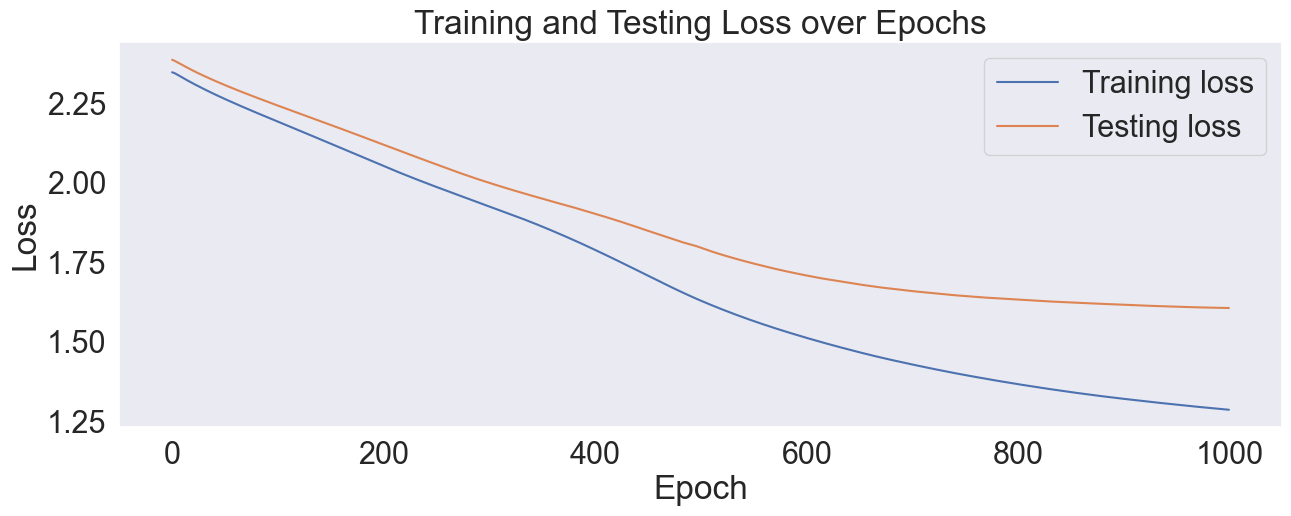

Validation loss at: 1.5595860481262207


In [77]:
model = nn_wine_classifier(X_train.shape[1],class_size=10)

best_test_loss ,model = train_nn(base_model = model, lr = 0.01, epochs = 1000, tolerance= 200)

In [78]:
X_train_ten = torch.tensor(X_train.values, dtype = torch.float)
X_test_ten = torch.tensor(X_test.values, dtype = torch.float)
X_val_ten = torch.tensor(X_val.values, dtype = torch.float)

y_train_ten = torch.tensor(y_train, dtype = torch.float)
y_train_pred = model.forward(torch.tensor(X_train_ten)).max(1)[1]
y_test_ten = torch.tensor(y_test, dtype = torch.float)
y_test_pred = model.forward(torch.tensor(X_test_ten)).max(1)[1]
y_val_ten = torch.tensor(y_val, dtype = torch.float)
y_val_pred = model.forward(torch.tensor(X_val_ten)).max(1)[1]

C:\Users\Owner\AppData\Local\Temp\ipykernel_20192\1600630203.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train_pred = model.forward(torch.tensor(X_train_ten)).max(1)[1]
C:\Users\Owner\AppData\Local\Temp\ipykernel_20192\1600630203.py:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_test_pred = model.forward(torch.tensor(X_test_ten)).max(1)[1]
C:\Users\Owner\AppData\Local\Temp\ipykernel_20192\1600630203.py:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_val_pred = model.forward(torch.tensor(X_val_ten)).max(1)[1]


In [79]:
y_train_ten

tensor([6., 5., 6.,  ..., 9., 9., 9.])

In [80]:
train_f1_nn = metrics.f1_score(y_train_ten.numpy(), y_train_pred.numpy(), average=None)
test_f1_nn = metrics.f1_score(y_test_ten.numpy(), y_test_pred.numpy(), average=None)
val_f1_nn = metrics.f1_score(y_val_ten.numpy(), y_val_pred.numpy(), average=None)

print(f"Training F1: {train_f1_nn}\n"
      f"Test F1: {test_f1_nn}\n"
      f"Validation F1: {val_f1_nn}")
print(f"Averages for metrics, Train: {metrics.f1_score(y_train_ten.numpy(), y_train_pred.numpy(), average='micro')} Test: {metrics.f1_score(y_test_ten.numpy(), y_test_pred.numpy(), average='micro')} Val: {metrics.f1_score(y_val_ten.numpy(), y_val_pred.numpy(), average='micro')}")


Training F1: [0.50608559 0.44020305 0.38443936 0.26435138 0.32902519 0.46924747
 0.93189702]
Test F1: [0.05555556 0.23076923 0.39130435 0.375      0.25454545 0.15384615
 0.        ]
Validation F1: [0.         0.13559322 0.46700508 0.30051813 0.32432432 0.15625
 0.        ]
Averages for metrics, Train: 0.48298253470667263 Test: 0.3076923076923077 Val: 0.31384615384615383


<Axes: >

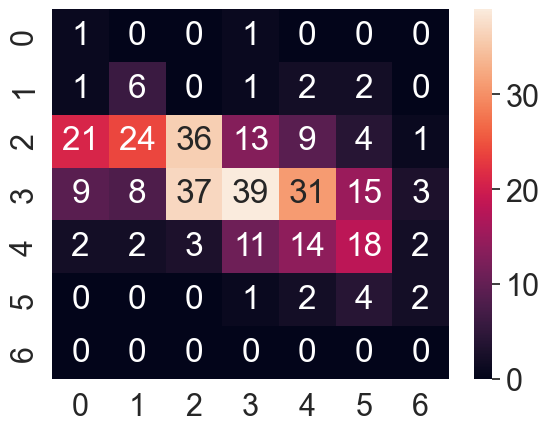

In [81]:
conf_matrix = metrics.confusion_matrix(y_true=y_test_ten.numpy(), y_pred=y_test_pred.numpy())
sns.heatmap(conf_matrix, annot=True)


### b) Optimising hyper parameters


Epoch [0/500], Train Loss: 2.3384337425231934, Test Loss: 2.38130521774292
Epoch 0 achieved best test result, saving...
Epoch 1 achieved best test result, saving...
Epoch 2 achieved best test result, saving...
Epoch 3 achieved best test result, saving...
Epoch 4 achieved best test result, saving...
Epoch 5 achieved best test result, saving...
Epoch 6 achieved best test result, saving...
Epoch 7 achieved best test result, saving...
Epoch 8 achieved best test result, saving...
Epoch 9 achieved best test result, saving...
Epoch [10/500], Train Loss: 2.3258490562438965, Test Loss: 2.368419647216797
Epoch 10 achieved best test result, saving...
Epoch 11 achieved best test result, saving...
Epoch 12 achieved best test result, saving...
Epoch 13 achieved best test result, saving...
Epoch 14 achieved best test result, saving...
Epoch 15 achieved best test result, saving...
Epoch 16 achieved best test result, saving...
Epoch 17 achieved best test result, saving...
Epoch 18 achieved best test re

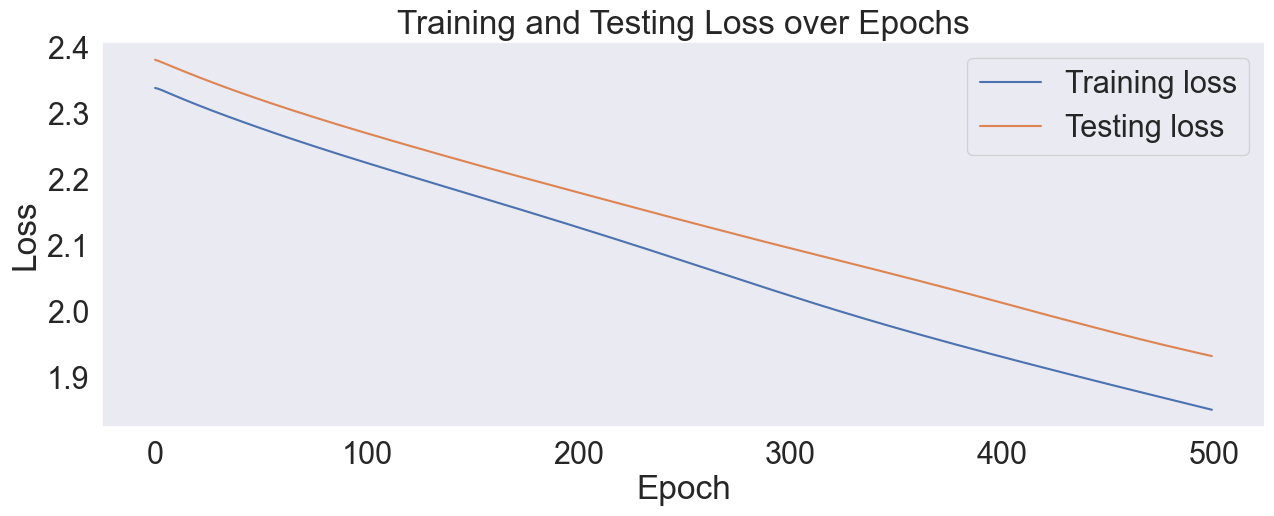

Validation loss at: 1.9232043027877808
Epoch [0/500], Train Loss: 2.326239585876465, Test Loss: 2.264937162399292
Epoch 0 achieved best test result, saving...
Epoch 1 achieved best test result, saving...
Epoch 2 achieved best test result, saving...
Epoch 3 achieved best test result, saving...
Epoch 4 achieved best test result, saving...
Epoch 5 achieved best test result, saving...
Epoch 6 achieved best test result, saving...
Epoch 7 achieved best test result, saving...
Epoch 8 achieved best test result, saving...
Epoch [10/500], Train Loss: 1.6808191537857056, Test Loss: 1.8061784505844116
Epoch 14 achieved best test result, saving...
Epoch 15 achieved best test result, saving...
Epoch [20/500], Train Loss: 1.3237603902816772, Test Loss: 1.6510909795761108
Epoch [30/500], Train Loss: 1.1758782863616943, Test Loss: 1.6743272542953491
Epoch [40/500], Train Loss: 1.0981544256210327, Test Loss: 1.5958431959152222
Epoch 48 achieved best test result, saving...
Epoch [50/500], Train Loss: 1.0

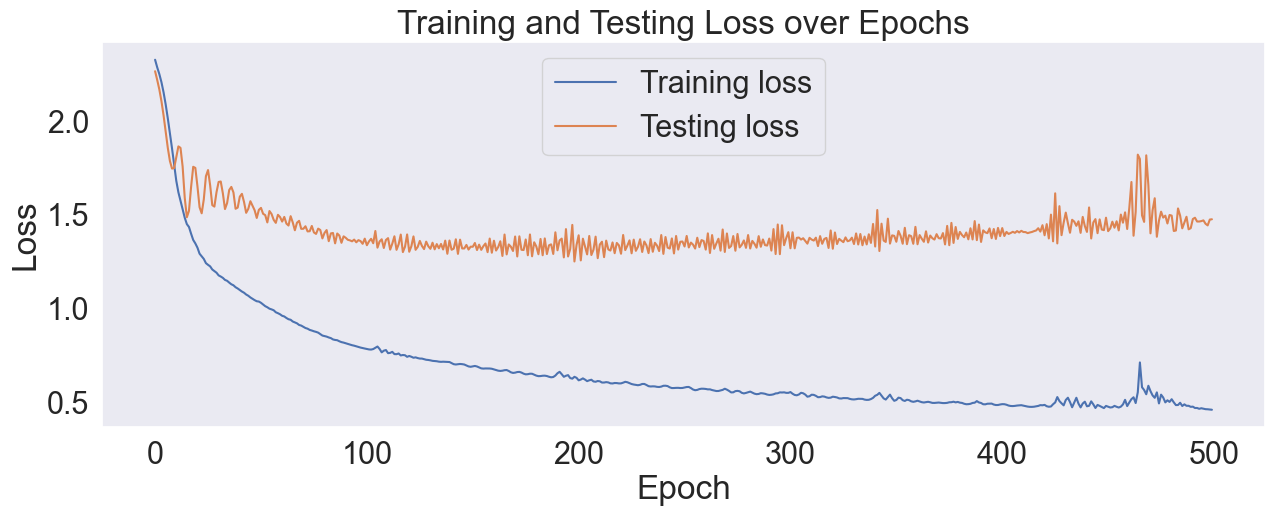

Validation loss at: 1.6495040655136108
Epoch [0/500], Train Loss: 2.2912228107452393, Test Loss: 2.3675317764282227
Epoch 0 achieved best test result, saving...
Epoch 1 achieved best test result, saving...
Epoch 2 achieved best test result, saving...
Epoch 3 achieved best test result, saving...
Epoch 4 achieved best test result, saving...
Epoch 5 achieved best test result, saving...
Epoch 6 achieved best test result, saving...
Epoch 7 achieved best test result, saving...
Epoch 8 achieved best test result, saving...
Epoch 9 achieved best test result, saving...
Epoch [10/500], Train Loss: 2.267320394515991, Test Loss: 2.338573932647705
Epoch 10 achieved best test result, saving...
Epoch 11 achieved best test result, saving...
Epoch 12 achieved best test result, saving...
Epoch 13 achieved best test result, saving...
Epoch 14 achieved best test result, saving...
Epoch 15 achieved best test result, saving...
Epoch 16 achieved best test result, saving...
Epoch 17 achieved best test result, 

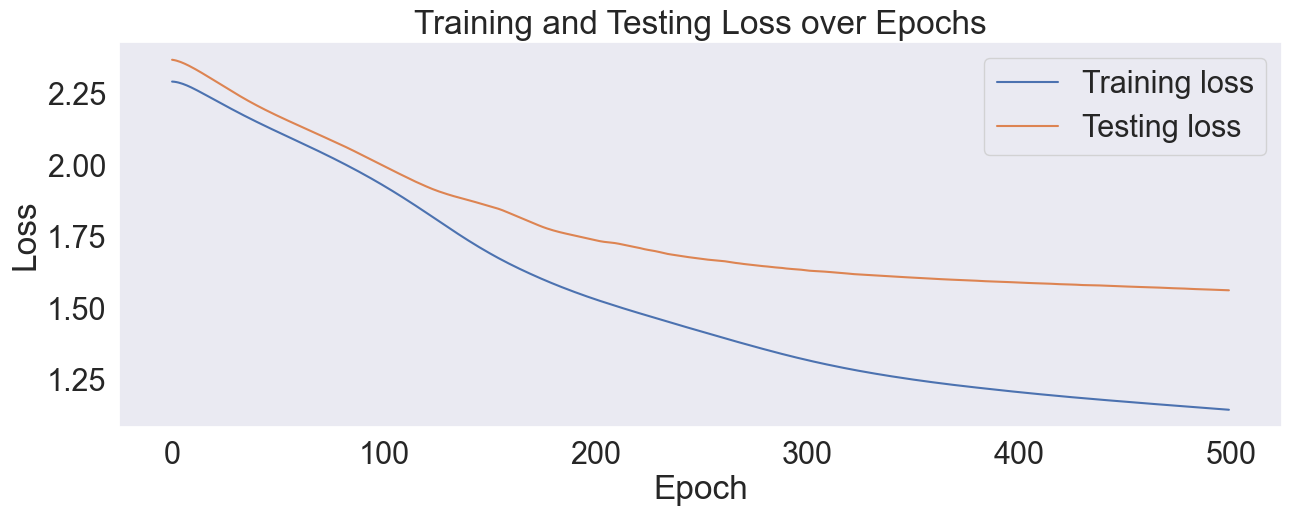

Validation loss at: 1.5066819190979004
Epoch [0/500], Train Loss: 2.312495470046997, Test Loss: 2.2475175857543945
Epoch 0 achieved best test result, saving...
Epoch 1 achieved best test result, saving...
Epoch 2 achieved best test result, saving...
Epoch 3 achieved best test result, saving...
Epoch 4 achieved best test result, saving...
Epoch 5 achieved best test result, saving...
Epoch 6 achieved best test result, saving...
Epoch [10/500], Train Loss: 1.6556448936462402, Test Loss: 1.9278942346572876
Epoch 10 achieved best test result, saving...
Epoch 11 achieved best test result, saving...
Epoch 12 achieved best test result, saving...
Epoch 13 achieved best test result, saving...
Epoch 14 achieved best test result, saving...
Epoch 15 achieved best test result, saving...
Epoch 16 achieved best test result, saving...
Epoch 17 achieved best test result, saving...
Epoch [20/500], Train Loss: 1.3386659622192383, Test Loss: 1.6316907405853271
Epoch 20 achieved best test result, saving...


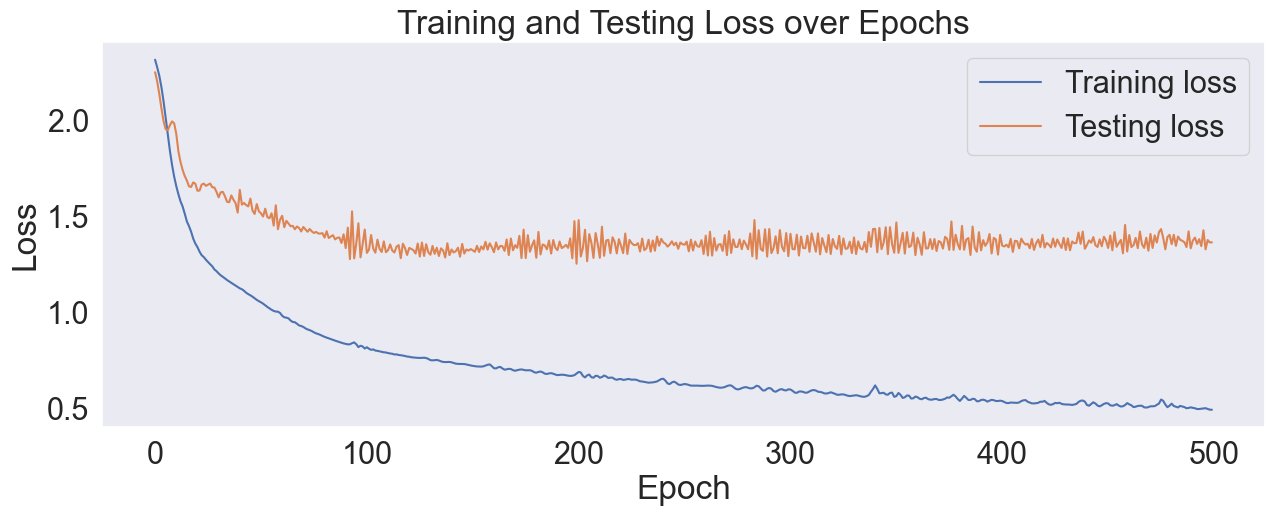

Validation loss at: 1.4799957275390625
Epoch [0/500], Train Loss: 2.3323187828063965, Test Loss: 2.270676374435425
Epoch 0 achieved best test result, saving...
Epoch 1 achieved best test result, saving...
Epoch 2 achieved best test result, saving...
Epoch 3 achieved best test result, saving...
Epoch 4 achieved best test result, saving...
Epoch 5 achieved best test result, saving...
Epoch 6 achieved best test result, saving...
Epoch 7 achieved best test result, saving...
Epoch 8 achieved best test result, saving...
Epoch 9 achieved best test result, saving...
Epoch [10/500], Train Loss: 2.330533504486084, Test Loss: 2.2689223289489746
Epoch 10 achieved best test result, saving...
Epoch 11 achieved best test result, saving...
Epoch 12 achieved best test result, saving...
Epoch 13 achieved best test result, saving...
Epoch 14 achieved best test result, saving...
Epoch 15 achieved best test result, saving...
Epoch 16 achieved best test result, saving...
Epoch 17 achieved best test result, 

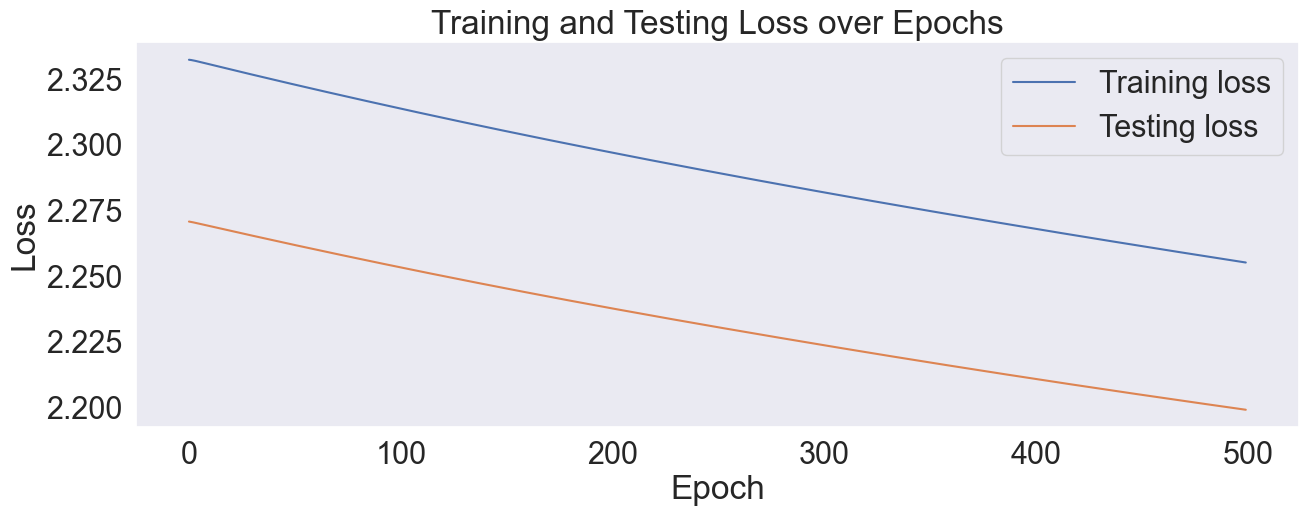

Validation loss at: 2.1946308612823486
Epoch [0/500], Train Loss: 2.2913529872894287, Test Loss: 2.304307222366333
Epoch 0 achieved best test result, saving...
Epoch 1 achieved best test result, saving...
Epoch 2 achieved best test result, saving...
Epoch 3 achieved best test result, saving...
Epoch 4 achieved best test result, saving...
Epoch 5 achieved best test result, saving...
Epoch 6 achieved best test result, saving...
Epoch 7 achieved best test result, saving...
Epoch 8 achieved best test result, saving...
Epoch 9 achieved best test result, saving...
Epoch [10/500], Train Loss: 2.239180564880371, Test Loss: 2.2666821479797363
Epoch 10 achieved best test result, saving...
Epoch 11 achieved best test result, saving...
Epoch 12 achieved best test result, saving...
Epoch 13 achieved best test result, saving...
Epoch 14 achieved best test result, saving...
Epoch 15 achieved best test result, saving...
Epoch 16 achieved best test result, saving...
Epoch 17 achieved best test result, 

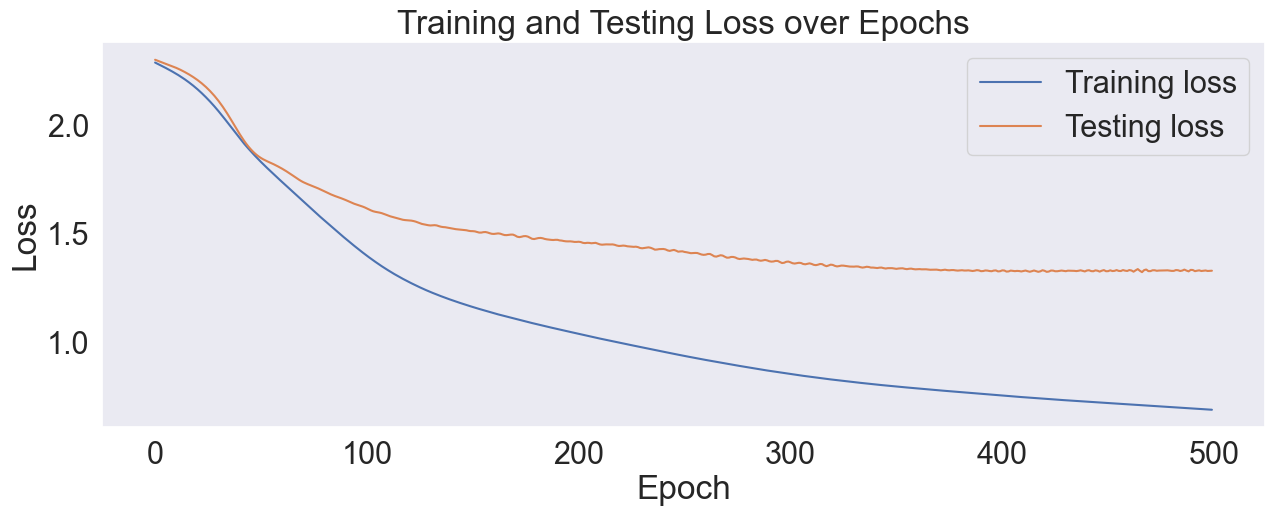

Validation loss at: 1.3783576488494873
Epoch [0/500], Train Loss: 2.344754219055176, Test Loss: 2.344327211380005
Epoch 0 achieved best test result, saving...
Epoch 1 achieved best test result, saving...
Epoch 2 achieved best test result, saving...
Epoch 3 achieved best test result, saving...
Epoch 4 achieved best test result, saving...
Epoch 5 achieved best test result, saving...
Epoch 6 achieved best test result, saving...
Epoch 7 achieved best test result, saving...
Epoch 8 achieved best test result, saving...
Epoch 9 achieved best test result, saving...
Epoch [10/500], Train Loss: 2.341701030731201, Test Loss: 2.3415894508361816
Epoch 10 achieved best test result, saving...
Epoch 11 achieved best test result, saving...
Epoch 12 achieved best test result, saving...
Epoch 13 achieved best test result, saving...
Epoch 14 achieved best test result, saving...
Epoch 15 achieved best test result, saving...
Epoch 16 achieved best test result, saving...
Epoch 17 achieved best test result, s

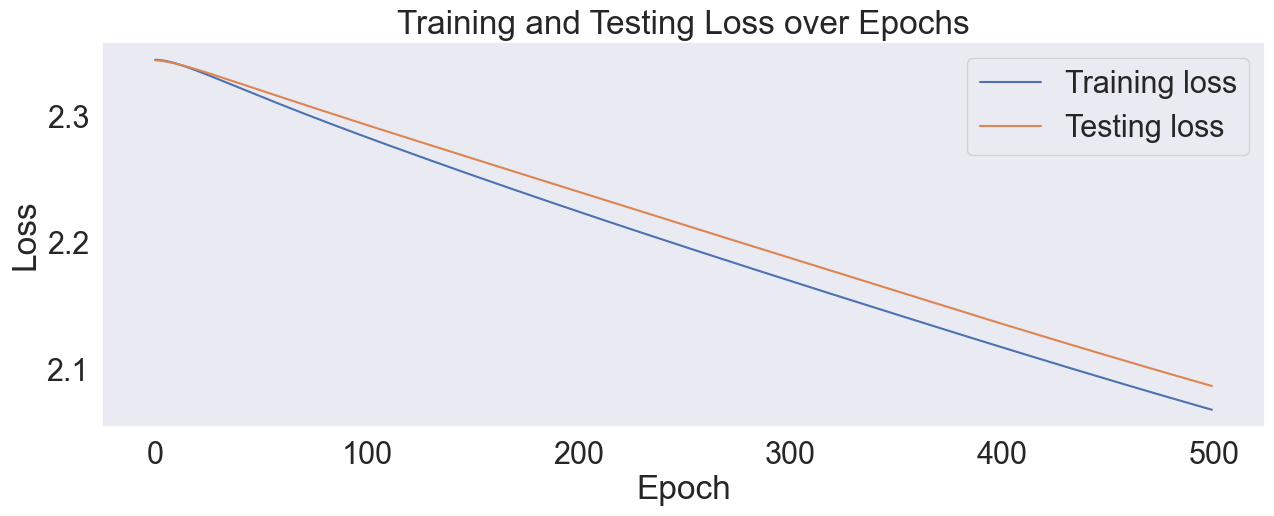

Validation loss at: 2.0866994857788086
Epoch [0/500], Train Loss: 2.2738099098205566, Test Loss: 2.2546184062957764
Epoch 0 achieved best test result, saving...
Epoch 1 achieved best test result, saving...
Epoch 2 achieved best test result, saving...
Epoch 3 achieved best test result, saving...
Epoch 4 achieved best test result, saving...
Epoch 5 achieved best test result, saving...
Epoch 6 achieved best test result, saving...
Epoch 7 achieved best test result, saving...
Epoch 8 achieved best test result, saving...
Epoch 9 achieved best test result, saving...
Epoch [10/500], Train Loss: 2.2218806743621826, Test Loss: 2.2085797786712646
Epoch 10 achieved best test result, saving...
Epoch 11 achieved best test result, saving...
Epoch 12 achieved best test result, saving...
Epoch 13 achieved best test result, saving...
Epoch 14 achieved best test result, saving...
Epoch 15 achieved best test result, saving...
Epoch 16 achieved best test result, saving...
Epoch 17 achieved best test result

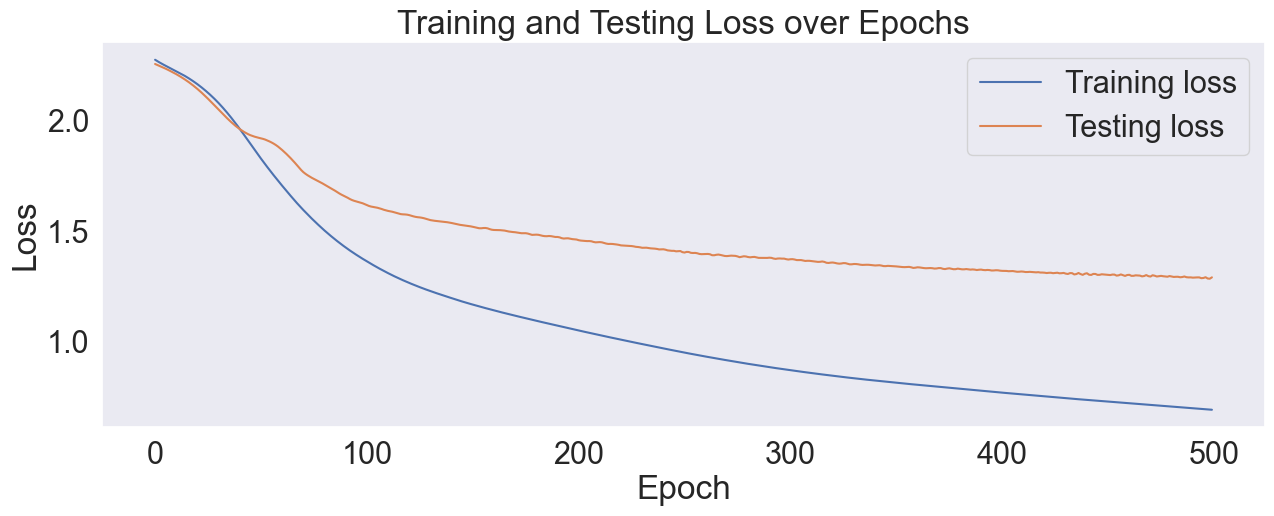

Validation loss at: 1.3963329792022705
Best params: {'lr': 0.01, 'epochs': 500, 'momentum': 0.5, 'optimiser_type': 'Adam'}, Best test loss: 1.2501639127731323


In [82]:
param_grid = {
    'lr': [0.01, 0.001],
    'epochs': [500],
    'momentum': [0.5, 0.9],
    'optimiser_type': ['SGD', 'Adam']
}

param_combinations = list(product(*param_grid.values()))

best_loss = np.inf
best_model = None
best_params = {}

for params in param_combinations:
    lr, epochs, momentum, optimiser_type = params
    
    # Initialize a new model for each iteration
    model = nn_wine_classifier(X_train.shape[1], class_size=10)
    
    # Train the model with current parameter combination
    test_loss, trained_model = train_nn(model, lr=lr, epochs=epochs,tolerance= 50, momentum=momentum, optimiser_type=optimiser_type)
    
    # Check if this model is the best so far
    if test_loss < best_loss:
        best_loss = test_loss
        best_model = trained_model
        best_params = {
            'lr': lr,
            'epochs': epochs,
            'momentum': momentum,
            'optimiser_type': optimiser_type
        }

print(f"Best params: {best_params}, Best test loss: {best_loss}")


Epoch [0/1500], Train Loss: 2.262223958969116, Test Loss: 2.1680848598480225
Epoch 0 achieved best test result, saving...
Epoch 1 achieved best test result, saving...
Epoch 2 achieved best test result, saving...
Epoch 3 achieved best test result, saving...
Epoch 4 achieved best test result, saving...
Epoch 5 achieved best test result, saving...
Epoch 6 achieved best test result, saving...
Epoch 7 achieved best test result, saving...
Epoch 8 achieved best test result, saving...
Epoch 9 achieved best test result, saving...
Epoch [10/1500], Train Loss: 1.6510119438171387, Test Loss: 1.7195972204208374
Epoch 10 achieved best test result, saving...
Epoch 11 achieved best test result, saving...
Epoch 12 achieved best test result, saving...
Epoch [20/1500], Train Loss: 1.3119981288909912, Test Loss: 1.6378883123397827
Epoch 21 achieved best test result, saving...
Epoch 25 achieved best test result, saving...
Epoch 29 achieved best test result, saving...
Epoch [30/1500], Train Loss: 1.16202199

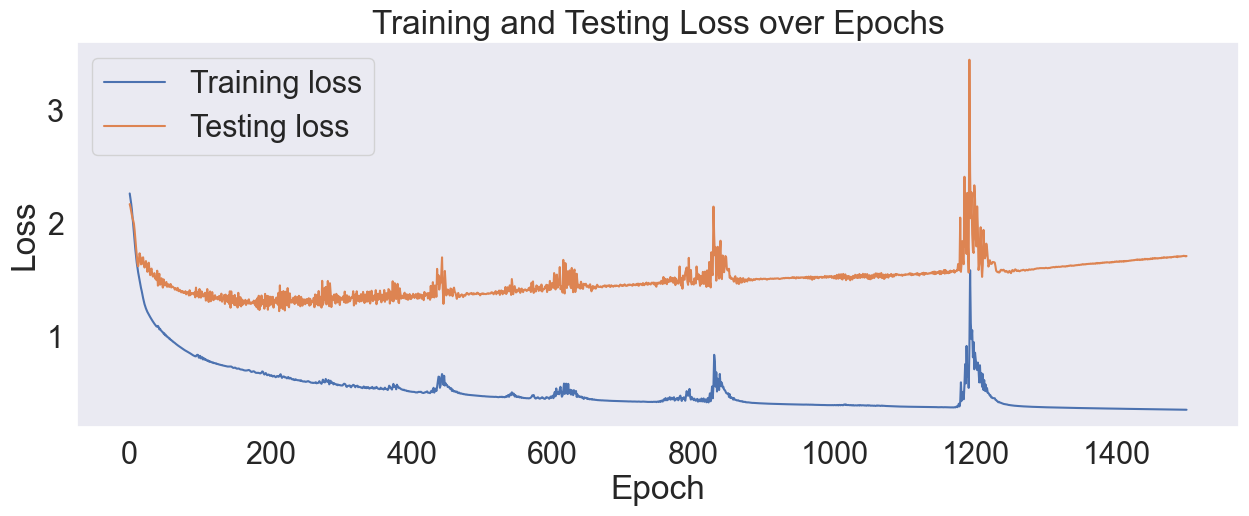

Validation loss at: 1.9689040184020996


In [83]:
model = nn_wine_classifier(X_train.shape[1],class_size=10)

best_test_loss ,model = train_nn(base_model = model, lr = 0.01, epochs = 1500, tolerance= 200, optimiser_type = 'Adam',momentum= 0.5)

### c) Performance metrics for training

In [84]:
X_train_ten = torch.tensor(X_train.values, dtype = torch.float)
X_test_ten = torch.tensor(X_test.values, dtype = torch.float)
X_val_ten = torch.tensor(X_val.values, dtype = torch.float)

y_train_ten = torch.tensor(y_train, dtype = torch.float)
y_train_pred = model.forward(torch.tensor(X_train_ten)).max(1)[1]
y_test_ten = torch.tensor(y_test, dtype = torch.float)
y_test_pred = model.forward(torch.tensor(X_test_ten)).max(1)[1]
y_val_ten = torch.tensor(y_val, dtype = torch.float)
y_val_pred = model.forward(torch.tensor(X_val_ten)).max(1)[1]

C:\Users\Owner\AppData\Local\Temp\ipykernel_20192\1600630203.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train_pred = model.forward(torch.tensor(X_train_ten)).max(1)[1]
C:\Users\Owner\AppData\Local\Temp\ipykernel_20192\1600630203.py:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_test_pred = model.forward(torch.tensor(X_test_ten)).max(1)[1]
C:\Users\Owner\AppData\Local\Temp\ipykernel_20192\1600630203.py:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_val_pred = model.forward(torch.tensor(X_val_ten)).max(1)[1]


In [85]:
train_f1_nn = metrics.f1_score(y_train_ten.numpy(), y_train_pred.numpy(), average=None)
test_f1_nn = metrics.f1_score(y_test_ten.numpy(), y_test_pred.numpy(), average=None)
val_f1_nn = metrics.f1_score(y_val_ten.numpy(), y_val_pred.numpy(), average=None)

print(f"Training F1: {train_f1_nn}\n"
      f"Test F1: {test_f1_nn}\n"
      f"Validation F1: {val_f1_nn}")
print(f"Averages for metrics, Train: {metrics.f1_score(y_train_ten.numpy(), y_train_pred.numpy(), average='micro')} Test: {metrics.f1_score(y_test_ten.numpy(), y_test_pred.numpy(), average='micro')} Val: {metrics.f1_score(y_val_ten.numpy(), y_val_pred.numpy(), average='micro')}")
F1_NN = metrics.f1_score(y_test_ten.numpy(), y_test_pred.numpy(), average='micro')
NN_model = model

Training F1: [0.99941257 0.9849479  0.7218543  0.48022599 0.7428254  0.98191612
 1.        ]
Test F1: [0.         0.21428571 0.58928571 0.44444444 0.47826087 0.34782609]
Validation F1: [0.         0.2        0.66666667 0.47161572 0.50724638 0.21052632]
Averages for metrics, Train: 0.8493058665472458 Test: 0.48615384615384616 Val: 0.5323076923076923


<Axes: >

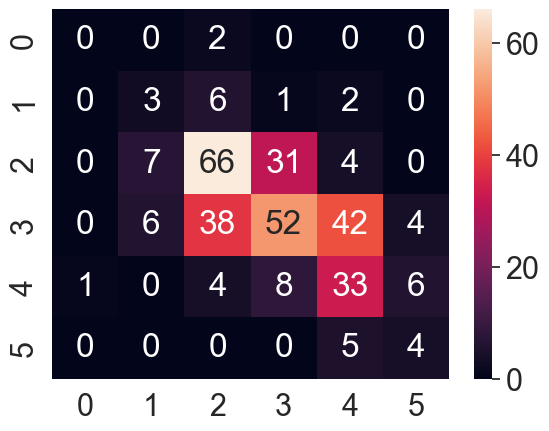

In [86]:
conf_matrix = metrics.confusion_matrix(y_true=y_test_ten.numpy(), y_pred=y_test_pred.numpy())
sns.heatmap(conf_matrix, annot=True)

## 6. Comparison of metrics performance for testing 


### a) Examining over-fitting

For the neural network we can see that the average f1 scores are as follows Averages for metrics, Train: 0.653 Test: 0.366 Val: 0.387 This suggests that the model has struggled to generlise on the unseen data, this suggests that the model could be underfited

The gradient booster holds signs of overfitting, The training data achieved 100% accuracy but this drops to 64% on test data which implies that there might be generlisation issues.


 

### b) Comparison with appropriate metrics for testing

In [87]:
print(f'Test F1 for neural network: {test_f1_nn}', "Test F1 for Gradient Booster; [0.         0.70535714 0.66       0.55357143 0.28571429]")



Test F1 for neural network: [0.         0.21428571 0.58928571 0.44444444 0.47826087 0.34782609] Test F1 for Gradient Booster; [0.         0.70535714 0.66       0.55357143 0.28571429]


It can be clearly seen that the gradient boosting algorithm has performed significantly better than the neural network on unseen test data. 

### c) Model selection

In [89]:
print(f'Comparing F1 test data scores. Neural network: {F1_NN}, Gradient boosting model: {F1_gb}')

if F1_NN > F1_gb:
    selected_model = NN_model

else:
    selected_model = GB_model


print(f'Optimal model : {selected_model}')

Comparing F1 test data scores. Neural network: 0.48615384615384616, Gradient boosting model: 0.6584615384615384
Optimal model : GradientBoostingClassifier(learning_rate=0.2, max_depth=6, min_samples_leaf=3,
                           n_estimators=200)


## 7. Final recommendation of best model

### a) Results from a technical perspective. 


We compared gradient boosting and a neural network based on their F1 scores throughout training, test, and validation sets in order to determine which model was best. With test and validation averages of roughly 0.66, gradient boosting demonstrated moderate generalisation to new data but high training performance (F1=1.0). This disparity suggests possible overfitting since the model might have picked up complex patterns unique to the training set yet be rigid when faced with new data. Gradient boosting, on the other hand, is more attractive for tabular datasets since it is computationally efficient with structured data and less susceptible to problems like disappearing gradients.

The neural network, on the other hand, demonstrated a moderate training F1 (0.64) along with lower test and validation scores (0.37 and 0.41, respectively), indicating that it has trouble with underfitting and requires additional fine-tuning in order to properly capture data patterns. Neural networks are versatile and strong, but they can be difficult to optimise and sometimes require large amounts of processing power. Gradient boosting is therefore suggested as the optimal model when taking efficiency and performance into account. Even though it overfits a little, its powerful performance and relative ease of use make it a better fit for this purpose than a neural network that needs more intricate tweaks to achieve similar results.

### b) Results from a business perspective.

Forecasting wine quality enables organisations to foresee consumer reaction and match goods to consumer demands. Targeting particular customer preferences is made possible by the gradient boosting model's constant performance across training, test, and validation sets, which allows for accurate wine quality forecasts. This methodology reduces the possibility of negative reviews and improves product positioning by enabling wineries or retailers to efficiently assess customer satisfaction prior to a wine's release.

Businesses can also improve production procedures or modify marketing plans in accordance with anticipated customer preferences by spotting trends in wine characteristics that are associated with quality. By striking a balance between interpretability and prediction accuracy, gradient boosting enables companies to make well-informed modifications quickly, improving both production quality and market alignment. Thus, this strategy offers a proactive means of guaranteeing that wines fulfil or beyond consumer expectations, enhancing brand recognition and patronage.

## 8. Conclusion

### a) What has been successfully accomplished and what has not been successful?

In order to forecast wine quality based on data attributes, we successfully created and assessed two models in this project: gradient boosting and a neural network. With a high F1 score on training data and fairly balanced results on test and validation datasets, the gradient boosting model demonstrated exceptional performance, indicating that it maintains accuracy while generalising effectively. This achievement shows that gradient boosting works well for finding important trends in wine attributes that are associated with quality scores. Because of its interpretability and reduced processing requirements, the model is also viable for possible business usage, supporting precise quality evaluations that may inform forecasts about consumer satisfaction and market decisions.

However, there were issues with the neural network model. This model suffered from underfitting, obtaining lower F1 scores across all datasets, despite the fact that neural networks are frequently effective at capturing intricate interactions. This implies that it was unable to properly understand the patterns in the data, which could be because there were not enough epochs, the hyperparameters were not ideal, or the dataset's size and features made it too complex. This model's deployment practicality is currently limited because it would need to be further adjusted to achieve performance levels comparable to gradient boosting.

Furthermore there was data quality issues which caused the dataset to be significantly imbalanced with some classes not appearing in the dataset at all, this means that the models accuracy will be dimished at the extreme ends of the rating system.



### b) Reflecting back on the analysis, what could I have done differently if I were to do the project again?



If I were to repeat the project, it would be imperative to apply the learnt lessons from the first iteration. A more extensive hyperparameter search would enable both the models to achieve greater accuracy whilst also boosting resilience to overfitting. I would experiment with other neural network architectures to attempt to improve performance. 
Experimenting with ensemble approaches or model stacking to combine the advantages of many algorithms could be another enhancement. The accuracy and stability of predictions could be increased by combining gradient boosting with neural networks, or by using simpler models. Lastly, seeking advice from subject-matter specialists to include other wine-specific characteristics, such as region or year of production, may result in more precise forecasts that are more in line with industry norms. Businesses looking for detailed information about how consumers react to various wine characteristics may find this method to be beneficial.


### c) A wish list of future work that I would like to do.

To continue to enhance the performance of the gradient booster it is essential that I optimise the model via an extensive hyperparameter search, this will enable me to explore all feasible hyperparameters for tuning. This will ensure that the model is trained under the best conditions.

I would like to experiment with ensemble methods as these could further boost performance by combining the predictions of the gradient booster and the neural network. This can mitigate individual weaknesses to create a more robust model.

Finally I intend to increase the database size, this would be achieved through research and help to address balancing issues and assist to generate greater insights into the underlying patters behind wine quality. 
